In [1]:
filename: str = "data/time_series/forecast_covid_single.csv"
file_tag: str = "COVID-19"
target: str = "deaths"
timecol: str = "date"

<Axes: xlabel='date', ylabel='deaths'>

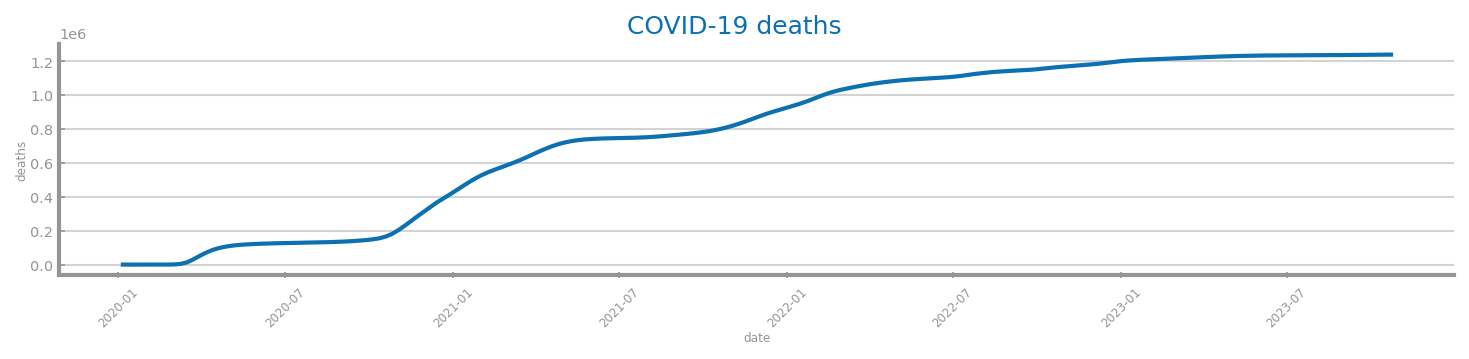

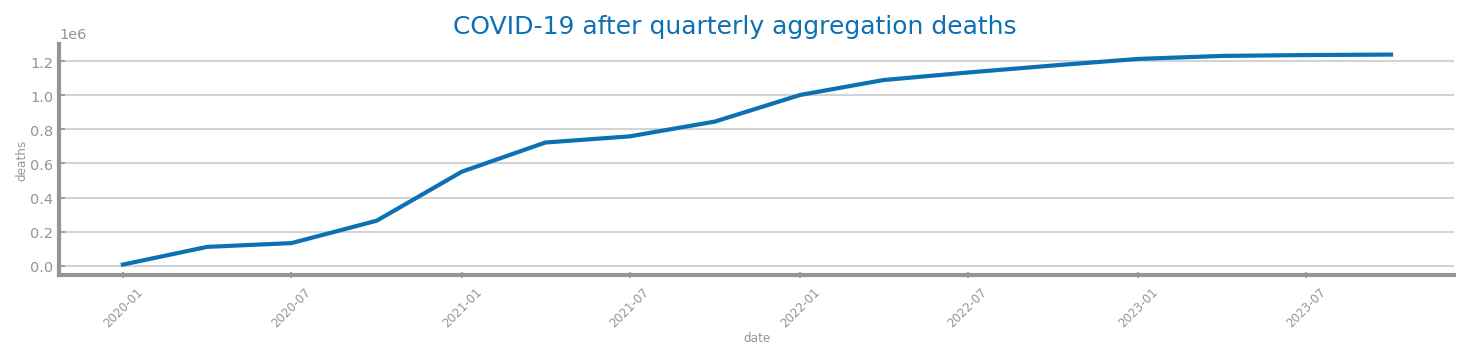

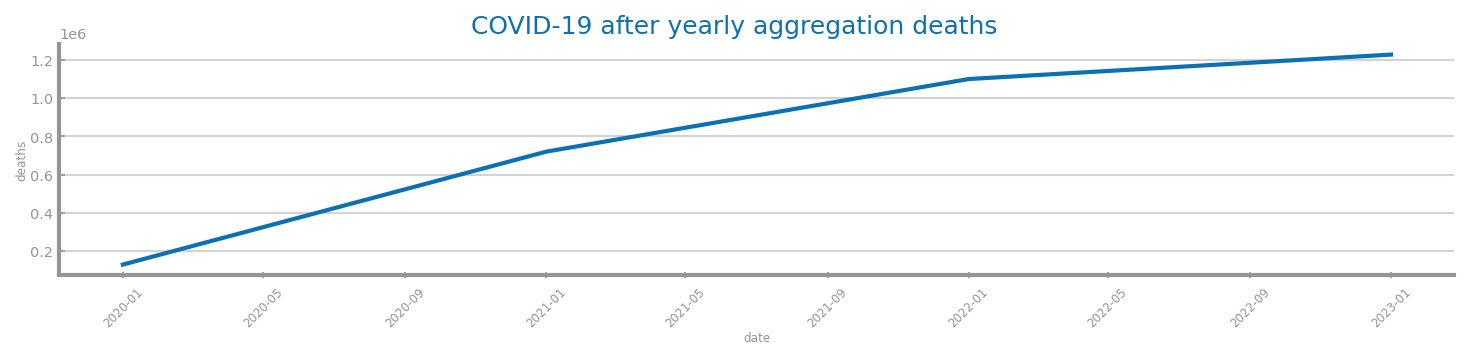

In [2]:
from matplotlib.pyplot import savefig, subplots
from matplotlib.axes import Axes
from matplotlib.figure import Figure
from pandas import DataFrame, read_csv

from dslabs_functions import HEIGHT, plot_line_chart, ts_aggregation_by

def plot_ts_multivariate_chart(data: DataFrame, title: str) -> list[Axes]:
    fig: Figure
    axs: list[Axes]
    fig, axs = subplots(data.shape[1], 1, figsize=(3 * HEIGHT, HEIGHT / 2 * data.shape[1]))
    fig.suptitle(title)

    for i in range(data.shape[1]):
        col: str = data.columns[i]
        auxi_ax: Axes = plot_line_chart(
            data[col].index.to_list(),
            data[col].to_list(),
            ax=axs,
            xlabel=data.index.name,
            ylabel=col,
        )
        auxi_ax.tick_params(axis="x", labelbottom="off")
    return axs
data: DataFrame = read_csv(
    "data/time_series/forecast_covid_single.csv",
    index_col="date",
    sep=",",
    decimal=".",
    parse_dates=True,
    infer_datetime_format=True,
)



plot_ts_multivariate_chart(data, title=f"{file_tag} {target}")


agg_df: DataFrame = ts_aggregation_by(data, gran_level="Q", agg_func="mean")
plot_ts_multivariate_chart(agg_df, title=f"{file_tag} after quarterly aggregation {target}")
# savefig(f"images/221_{file_tag}_quarterly_{target}.png")

agg_df: DataFrame = ts_aggregation_by(data, gran_level="Y", agg_func="mean")
plot_ts_multivariate_chart(agg_df, title=f"{file_tag} after yearly aggregation {target}")
# savefig(f"images/221_{file_tag}_yearly_{target}.png")

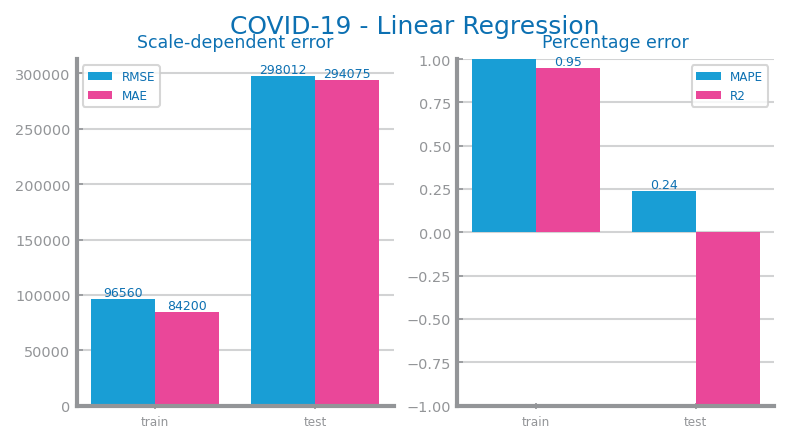

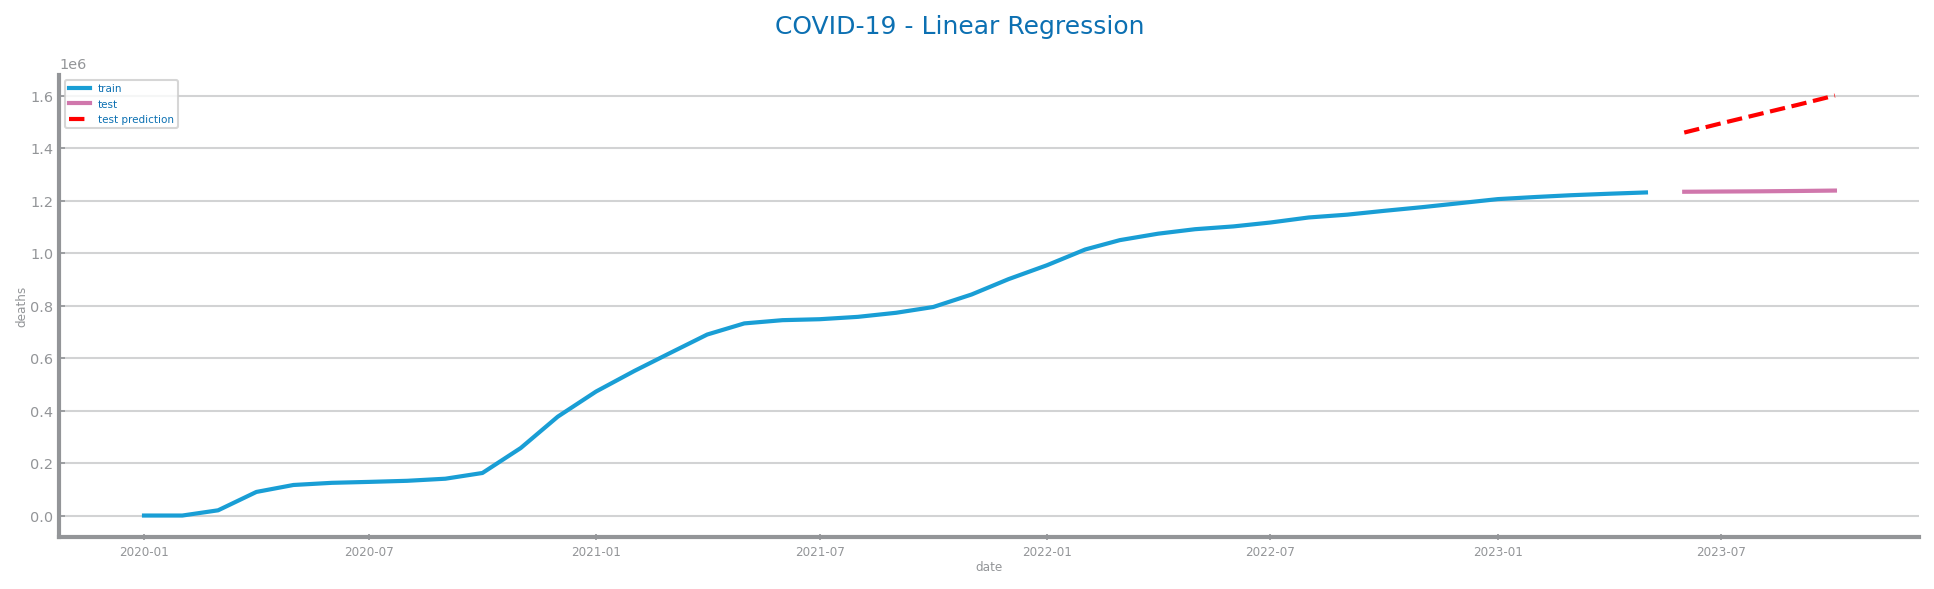

In [3]:
from numpy import arange
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import savefig
from sklearn.linear_model import LinearRegression
from dslabs_functions import series_train_test_split, plot_forecasting_eval, ts_aggregation_by

filename: str = "data/time_series/forecast_covid_single.csv"
file_tag: str = "COVID-19"
target: str = "deaths"
timecol: str = "date"

data: DataFrame = read_csv(filename, index_col=timecol, sep=",", decimal=".", parse_dates=True)
series: Series = data[target]

aggr = "M"

agg_df: DataFrame = ts_aggregation_by(data, gran_level=aggr, agg_func="mean")

def bla(data):
    train, test = series_train_test_split(agg_df, trn_pct=0.90)

    trnX = arange(len(train)).reshape(-1, 1)
    trnY = train.to_numpy()
    tstX = arange(len(train), len(data)).reshape(-1, 1)
    tstY = test.to_numpy()

    model = LinearRegression()
    model.fit(trnX, trnY)

    prd_trn: Series = Series(model.predict(trnX), index=train.index)
    prd_tst: Series = Series(model.predict(tstX), index=test.index)

    return train, test, prd_trn, prd_tst

train, test, prd_trn, prd_tst = bla(agg_df)

plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag} - Linear Regression")
savefig(f"images/{file_tag}_linear_regression_eval_{aggr}.png")

from dslabs_functions import plot_forecasting_series

plot_forecasting_series(
    train,
    test,
    prd_tst,
    title=f"{file_tag} - Linear Regression",
    xlabel=timecol,
    ylabel=target,
)
savefig(f"images/{file_tag}_linear_regression_forecast_{aggr}.png")